# Home Assignment No. 2: Part 2 (Theory)

In this part of the homework you are to solve several simple theoretical problems related to machine learning algorithms.
* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**.
* Your solution must me **COMPLETE**, i.e. contain all required formulas/proofs/detailed explanations.
* You must write your solution for any problem right after the words **YOUR SOLUTION**. Attaching pictures of your handwriting is allowed, but **highly discouraged**.
## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

# Task1. Bayesian methods (1 point)

For a dataset $D =(X,y) =\{(x_i,y_i)\}^m_{i=1}$, $x_i \in \mathbb{R}^d$, $y_i\in\mathbb{R}$ it is known,that 
$$y_i = w^T x_i + \epsilon$$
where $\epsilon \sim N(0,\sigma^2)$, $w  \sim N(0,\alpha I)$ . Suppose that $X^T X =I$, where $I$ is the identity matrix. Derive MAP estimation for $w$.

### Your solution
Apriory probability ow $w$:
$$
P(w|0,\alpha I) = \frac{1}{\sqrt{2\pi\alpha I}} \exp{\frac{-w^2}{2\pi\alpha I}} =
$$
A-posteriori probability:
$$
 P(w|D)= \frac{P(w|0,\alpha I) P(D|w)}{P(D)}
$$
Where 
$$
P(D|w) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{\frac{-(y-w^Tx)^2}{2\pi\sigma^2}}
$$
Maximum a-posteriori (MAP):
$$
w_{MAP} = argmax_w  log(P(w|D))=argmax_w log(P(w))+log(P(D|w))+log(P(D))
$$
Since $P(D)$ is a constant and does not affect optimization:
$$
w_{MAP}= argmax_w\big(log(P(w)+log(P(D|w))\big) = argmax_w\bigg( log(\frac{1}{\sqrt{2\pi\alpha I}} \exp{\frac{-w^2}{2\pi\alpha I}})+log(\frac{1}{\sqrt{2\pi\sigma^2}} \exp{\frac{-(y-w^Tx)^2}{2\pi\sigma^2}}))\bigg)
$$
Eliminate all the constants, change signs and, therefore, maximize to minimize and simplify the expression:
$$
w_{MAP}= argmin_w\big(  \frac{-||w||^2}{\alpha} +\frac{1}{\sigma^2}\sum_{i=1}^{m}(y_i-w^Tx_i) ^2 \big)
$$

# Task 2. Gaussian Processes 1 (1 point)

Let $\sigma_n(\mathbf{x}_*)$ be a predictive variance at point $\mathbf{x}_*$ of a Gaussian Process $f_n$ with zero mean and covariance $k(\cdot,\cdot)$ that was built using first $n$ training points.
Prove that for $\forall \mathbf{x}_*$ it holds
$$
    \sigma_{n}(\mathbf{x}_*) \leq \sigma_{n-1}(\mathbf{x}_*).
$$


### Your solution
Predicted variance of a Gaussian Process can be represented as follows:
$$
\sigma_{n}(\mathbf{x}_*) = k(x_*, x_*) - k_*^T(K_n+\sigma^2I_n)^{-1} k_*
$$
Then the inequality can be rewritten the following way:
$$
     k_*^T(K_n+\sigma^2I_n)^{-1} k_* \geq k_{n-1}(x_*)^T(K_{n-1}+\sigma^2I_{n-1})^{-1} k_{n-1} (x_*)
$$
Matrix $K_n+\sigma^2I_n$ can be written the following way:
$$
\begin{pmatrix}
K_{n-1}+\sigma^2I_{n-1} & k_{n-1}(x_n) \\
k_{n-1}(x_n)^T & k(x_n,x_n)+ \sigma^2
\end{pmatrix}
$$
Here $k_{n-1}(x_n)$ is a vector of covariences:
$$
\begin{pmatrix}
k(x_1,x_n) \\
\dots\\
k(x_{n-1},x_n)\\
\end{pmatrix}
$$
Inversed matrix $(K_n+\sigma^2I_n)^{-1}$ can be found by the formula of the inversed matrix from block matrix:
$$
\begin{pmatrix}
A & B \\
C & D
\end{pmatrix}^{-1}
=
\begin{pmatrix}
A^{-1}+A^{-1}B(D-CA^{-1}B)^{-1}CA^{-1} & -A^{-1}B(D-CA^{-1}B)^{-1} \\
-(D-CA^{-1}B)^{-1}CA^{-1} & (D-CA^{-1}B)^{-1}
\end{pmatrix}
$$
Lets substitute (denoting $G =(D-CA^{-1}B)^{-1} $) $B, C, D$ with the corresponding blocks and multimply by square of $k_* $:
$$
k_*^T
\begin{pmatrix}
A^{-1}+A^{-1}k_{n-1}(x_n)Gk_{n-1}(x_n)^TA^{-1} & -A^{-1}k_{n-1}(x_n)G \\
-Gk_{n-1}(x_n)^TA^{-1} & G
\end{pmatrix}
k_*
=
\begin{pmatrix}
k_{n-1}(x_*) \\
k_{n}(x_*)\\
\end{pmatrix}^T
\begin{pmatrix}
A^{-1}+A^{-1}k_{n-1}(x_n)Gk_{n-1}(x_n)^TA^{-1} & -A^{-1}k_{n-1}(x_n)G \\
-Gk_{n-1}(x_n)^TA^{-1} & G
\end{pmatrix}
\begin{pmatrix}
k_{n-1}(x_*) \\
k_{n}(x_*)\\
\end{pmatrix}
$$
Now lets multimply and get the following expression:
$$ k_{n-1}^T(x_*)A^{-1}k_{n-1}(x_*)+k_{n-1}^T(x_*)A^{-1}k_{n-1}(x_n)Gk_{n-1}^T(x_n)A^{-1})k_{n-1}(x_*)+k_{n}(x_*)(-Gk_{n-1}(x_n)^TA^{-1})k_{n-1}(x_*)+k_{n-1}(x_*) (-A^{-1}k_{n-1}(x_n)G)k_{n}(x_*)+k_{n}(x_*)Gk_{n}(x_*)$$
Lets  simplify the expression:
$$k_{n-1}^T(x_*)A^{-1}k_{n-1}(x_*)+G(k_{n-1}^T(x_*)A^{-1}k_{n-1}(x_n)-k_{n}(x_*))^2 $$
The right term is always positive, the left is: $$ k_{n-1}(x_*)^T(K_{n-1}+\sigma^2I_{n-1})^{-1} k_{n-1} (x_*)$$ Which is lower then the initial expression by the positive right term, that means, that $$ k_*^T(K_n+\sigma^2I_n)^{-1} k_* \geq k_{n-1}(x_*)^T(K_{n-1}+\sigma^2I_{n-1})^{-1} k_{n-1} (x_*)$$ Q.E.D.

# Task 3. Gaussian Processes 2 (1 point)

Consider you have gaussian distribution on $R$ with zero mean and differentiable by arguments covariation funtion $k(x, \tilde{x})$.Get an expression for the correlation between the implementation of a Gaussian process  $y(x) ∼ GP (0, k(x, x ^{\prime}))$ and its derivative $\frac{\partial y(\tilde x)}{\partial \tilde x}$ .

### Your solution

# Task 4. Kernel theory (1 point)

Let $K(x, x'):\mathcal{X}\times \mathcal{X}\rightarrow \mathbb{R}$ be a PDS kernel,
and $\phi\colon \mathcal{X} \to \mathcal{H}$ its <b>unknown </b> feature mapping. For $x,x'\in\mathcal{X}$ derive the formula for the **distance** between $
\phi(x)$ and $\phi(x')$ in $\mathcal{H}$.
 

### Your solution
Distance between two points squared is a squared norm of their difference:
$$
||\phi(x)-\phi(x')||^2=(\phi(x)-\phi(x'),\phi(x)-\phi(x')) = (\phi(x),\phi(x)) +(\phi(x'),\phi(x'))-2(\phi(x),\phi(x'))
$$
Then the distance:
$$
\sqrt{(\phi(x),\phi(x))+(\phi(x'),\phi(x'))-2(\phi(x),\phi(x')} = \sqrt{(K(x,x)+K(x',x')-2K(x,x')}
$$

# Task 5. Naive Gradient Boosting Regression (1 points)

You are given a regression dataset, consisting of 5 samples with 1-dimensional feature vector $X$ and scalar target vector $y \in \mathbb{R}$:

|  x   |  y   | 
|:----:|:----:| 
|  10  |  1   | 
|  32  |  9   | 
|  46  |  13  | 
|  54  |  16  | 
|  63  |  23  | 

In this task you are asked to implement **3 steps of Gradient Boosting Regression** with decision tree stumps as the learners $h_0, h_1, h_2$. 

In order to complete this task:
1. Refer to the slides on naive boosting for regression in **Lecture 8**.
2. Assume that the initial model $f_0$ is the mean of the target vector $y$
3. According to the algorithm on the boosting approach for regression from **1.**, compute the residuals
4. Manually, find a suitable split among the $x_i$ for each decision tree weak model $h_t(X)$, which minimizes the loss function:

$$L_{\text{split_i}} = \frac{\text{Var}_{left\_split}*N_{1} + \text{Var}_{right\_split}*N_{2}}{N_{1}+N_{2}}$$

where  $\text{Var}$ is the variance of the values contained in each leaf, $N_1$ is the number of target values $y$ in the left leaf, $N_{2}$ - in the right leaf

5. Perform the Gradient Boosting step on the ensemble model $f_t$ with the resulting decision tree stump predictions (assume that the learning rate $lr=1.0$).

**Note on Decision Tree Stumps:** A decision tree stump is a decision tree, which consists only of the root and its immediate leaves. In case of this task, at each iteration you are asked to consider 5 different variants of the decision tree stumps $h_t^i$ - one variant for each of the split candidates $x_i$. You should choose the variant that minimizes the loss written above. The two leaves of the tree are formed according to the rule:

```python
if x_i < split:
    target_value -> left leaf
elif x_i >= split:
    target_value -> right leaf
```
**HINT:** Think about what should be `target_value` equal to in case of Gradient Boosting Regression.

The prediction of decision tree stump $h_t(x_i)$ is the mean of the values of the according leaf.



**The task**:

* Fill in the table - round the values of table up to the second digit after decimal point:


|   x  |   y  |$f_0$|$$y - f_0$$|$L$|$h_0$|$f_1$|$$y-f_1$$|$L$|$h_1$|$f_2$|$$y - f_2$$|$L$|$h_2$|$F_3$|
|------|------|-----|-----------|---|-----|-----|---------|---|-----|-----|-----------|---|-----|-----|
|  10  |  1   |  12.40  |    -11.40      | NaN |  -7.40  |  5  |    -4    | NaN |  -1.42  |  3.58  |    -2.58      | NaN |  -2.58  |  1  | 
|  32  |  9   |  12.40  |    -3.40      | 20.95 |  -7.40  |  5  |    4    | 12.93 |  -1.42  |  3.58  |    5.42      | 7.24 |  0.65  |  4.23  |
|  46  |  13  |  12.40  |    0.60      | 16.93 |  4.93  |  17.33  |    -4.33    | 16.93 |  -1.42  |  15.92  |    -2.92      | 7.57 |  0.65  |  16.56  |
|  54  |  16  |  12.40  |    3.60      | 19.83 |  4.93  |  17.33  |    -1.33    | 13.80 |  -1.42  |  15.92  |    0.08      | 8.90 |  0.65  |  16.56  |
|  63  |  23  |  12.40  |    10.6      | 25.35 |  4.93  |  17.33  |    5.67    | 8.91 |  5.67  |  23  |    0      | 8.91 |  0.65  |  23.65  |


where $L$ is the loss, calculated by the formula for decision tree stumps above, for each of the 5 split variants of the decision tree stump at each iteration
* Write down the splits (the feature values) you have found for each of the tree stumps

* Insert the predictions of the full ensemble model and the split values, you have achieved after 3 iterations into the plotting cell below (**COPY AND PASTE** the last column from the table above and the splits list to the plotting cell below, instead of **#your solution**):

In [0]:
from statistics import mean 
import numpy as np
from itertools import groupby
import matplotlib.pyplot as plt

In [0]:
def plot_tree(x,F,stumps):
    x_range = np.arange(np.min(x), np.max(x)+1)
    x_r = []
    f_r = []
    stmps = [0] + stumps + [np.inf]
    for st in range(1,len(stmps)):
        x_r.extend([list(group) for k, group in groupby(x_range, lambda x: x<stmps[st] and x>=stmps[st-1]) if k])
        f_r.append([f_i for f_i,x_ii in zip(F,x) if x_ii<stmps[st] and x_ii>=stmps[st-1]])
    F_to_plot = []
    for ft in range(len(f_r)):
        #assert len(f_r) == len(x_r)
        if len(f_r[ft]) == 1:
            F_to_plot.extend([f_r[ft][0]]*len(x_r[ft]))
        elif len(f_r[ft]) > 1:
            F_to_plot.extend([mean(f_r[ft])]*len(x_r[ft]))
    return F_to_plot

## PLOTTING CELL##

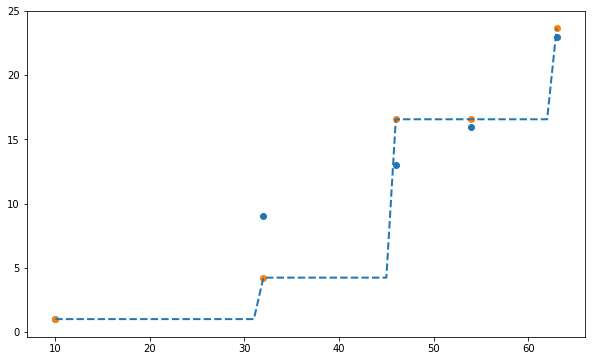

In [159]:
x = [10,32,46,54,63]
y = [1, 9, 13, 16, 23]

#note that the order of F(x_i) should be corresponding to the order of x_i in the table
f0 = mean(y)
############ INSERT YOUR SOLUTION HERE###############
y_f0 = [y[i]-f0 for i in range(len(y))]

#Function to split sample by some split value
def tree_split(x, y, split):
  x_left = []
  x_right = []
  y_left = []
  y_right = []
  for i in range(len(x)):
    if x[i] < split:
      x_left += [x[i]]
      y_left += [y[i]]
    elif x[i] >= split:
      x_right += [x[i]]
      y_right += [y[i]]
  result = [x_left, x_right, y_left, y_right]
  return result

#Function to find a split resulting in the smallest L value
def find_best_split(x, y):
  L = []
  for k in x:
    split = k
    leafs = tree_split(x, y, split)
    if len(leafs[2]) ==0:
      L += ['NaN']
    else:
      L += [(np.var(leafs[2] )*len(leafs[2])+np.var(leafs[3])*len(leafs[3]))/(len(leafs[2])+len(leafs[3]))]
  split = x[np.argmin(L[1:])+1]
  leafs = tree_split(x, y, split)
  return split, leafs, L

# Function to find value of h and f in different leafes
def f(leafs, y, f0):
  hl = mean(leafs[2])
  hr = mean(leafs[3])
  
  h  =[]
  for i in range(len(y)):
    if type(f0) !=list:
      f0 = [f0 for i in range(len(y))]
    if i < len(leafs[2]):
      h += [hl]
    else:
      h += [hr]
  f =[]
  for i in range(len(y)):
    f += [f0[i]+h[i]]

  return h, f

# Calling the functions in the iterative order
split1, leafs1, L1 = find_best_split(x, y_f0)

h0, f1 = f(leafs1, y, f0)
y_f1 = [y[i]-f1[i] for i in range(len(y))]

split2, leafs2, L2 = find_best_split(x, y_f1)

h1, f2 = f(leafs2, y, f1)

y_f2 = [y[i]-f2[i] for i in range(len(y))]

split3, leafs3, L3 = find_best_split(x, y_f2)

h2, f3 = f(leafs3, y, f2)

F3 = f3

splits = [split1, split2, split3]

boosted_F_plot = plot_tree(x, F3, stumps = list(np.sort(splits)))
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(x,y, label = 'original')
ax.scatter(x, F3, label = 'predicted')
x_range = np.arange(np.min(x), np.max(x)+1)
ax.plot(x_range,boosted_F_plot,'--', linewidth=2, label = 'composite function')
plt.show()

# Task 6. AdaBoost (1 point)

For each of the following cases,explain how AdaBoost, as given in **Lecture 7**, will treat a weak hypothesis $h_t$ with weighted error $N_t(h_t , w_t )$. Also, in each case, explain why this behavior takes place.
1. $N_t = \frac{1}{2}$
2. $N_t > \frac{1}{2}$
3. $N_t = 0$

### Your solution
Weight of each estimator in AdaBoost is calculated with help of the following formula:
$$
\alpha = \frac{1}{2}log( \frac{1-N_t}{N_t} )\space (1)
$$
From which we can easily interpretate influence of different values of $N_t$.

1) $N_t = \frac{1}{2}$ if we put this value in (1) we get:
$$
\alpha = \frac{1}{2}log1 = 0
$$
Zero wheight of an estimator $h_t$ means, that it does not participate in voting and have no influence on the final result.

2) $N_t > \frac{1}{2}$ this value in $\frac{1-N_t}{N_t}$ gives a value between 0 and 1 if we put it in (1) we get $\alpha <  0$ since logarithm is negative, when its argument between 0 and 1. That means, that the weight of a classifier is negative and it will reverse the sign, that the classifier gives.

3)$N_t=0$ if we put this value in (1), we get:
$$
\alpha =  \frac{1}{2}log( \frac{1-0}{0} ) = +\infty
$$
If the classifier has an error equal to 0, it gives a weight going to infinity, and this estimator outperformes any others. That means, that we can rely only on this classifier, because it is an ideal one. But it is not a practical kind of situation.